<a href="https://colab.research.google.com/github/Mish-Aastha/Sentiment-Analysis-using-Twitter-Data/blob/main/Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing important libraries
import tweepy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import re
import seaborn as sns
from wordcloud import WordCloud

In [2]:
# Twitter Authentication and parsing tweets
consumer_key='M5RkvauNLkFZuDiWLtQ0QpmCN'
consumer_secret='QMawuuBkE8Djnt32Jplka8xfFNl08Fpatm6ilXKJdXNTLuOiOO'
access_token='1380920170177130573-119UB5a06S4h31r9gIHjSk9wqRx3rI'
access_token_secret='tnlhjZUJ1pYecZ9mFEGzQtDXe9Yhnqo6LvaUgMXnYTYIw'
auth=tweepy.OAuthHandler(consumer_key,consumer_secret)
auth.set_access_token(access_token,access_token_secret)
api=tweepy.API(auth)


In [3]:
number_of_tweets=200
tweets=[]
for i in tweepy.Cursor(api.search,q='Covid Vaccination Drive', tweet_mode='extended').items(number_of_tweets):
  tweets.append(i.full_text)

In [4]:
df=pd.DataFrame({'tweets':tweets})

In [5]:
df.head()

,tweets
0,RT @SowetanLIVE: The Gauteng government is\nem...
1,"RT @DeccanHerald: For instance, the vaccinatio..."
2,RT @SowetanLIVE: The Gauteng government is\nem...
3,Joe Biden ramps up vaccination drive with new ...
4,RT @SowetanLIVE: The Gauteng government is\nem...


In [6]:
# Preprocessing
# Function to clean the tweets
def clean(text):
  text=re.sub(r"@[A-Za-z0-9]+", "",text) #removes mentions
  text=re.sub(r"#","",text) #removing #
  text=re.sub(r"RT[\s]+","",text) #removes RT
  text=re.sub(r":","",text) # removes colon
  text=re.sub(r"https?:\/\/\S+","",text)
  return text
  

In [7]:
df["tweets"]=df["tweets"].apply(clean)
df["tweets"]=df["tweets"].astype('string')
df.head()

,tweets
0,The Gauteng government is embarking on a driv...
1,"For instance, the vaccination drive has come ..."
2,The Gauteng government is embarking on a driv...
3,Joe Biden ramps up vaccination drive with new ...
4,The Gauteng government is embarking on a driv...


In [8]:
! pip install transformers

In [9]:
# Using transformers library to detect the sentiment
from transformers import AutoTokenizer, TFAutoModelForSequenceClassification

In [10]:
model_name = "distilbert-base-uncased-finetuned-sst-2-english"
model=TFAutoModelForSequenceClassification.from_pretrained(model_name,from_pt=True)

All PyTorch model weights were used when initializing TFDistilBertForSequenceClassification.

All the weights of TFDistilBertForSequenceClassification were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertForSequenceClassification for predictions without further training.


In [11]:
from transformers import pipeline
tokenizer= AutoTokenizer.from_pretrained(model_name)
classifier = pipeline('sentiment-analysis', model=model, tokenizer=tokenizer)

In [12]:
sentiment=[]
score=[]
results= classifier(tweets)
for result in results:
  print(f"label:{result['label']},with score:{round(result['score'],2)}")
  sentiment.append(result['label'])
  score.append(result['score'])

label:POSITIVE,with score:0.96
label:NEGATIVE,with score:1.0
label:POSITIVE,with score:0.96
label:NEGATIVE,with score:0.84
label:POSITIVE,with score:0.96
label:NEGATIVE,with score:0.87
label:POSITIVE,with score:0.63
label:NEGATIVE,with score:0.99
label:POSITIVE,with score:0.94
label:POSITIVE,with score:0.96
label:POSITIVE,with score:0.92
label:NEGATIVE,with score:0.99
label:POSITIVE,with score:0.92
label:NEGATIVE,with score:0.99
label:POSITIVE,with score:0.75
label:NEGATIVE,with score:0.99
label:POSITIVE,with score:0.92
label:NEGATIVE,with score:1.0
label:NEGATIVE,with score:0.97
label:NEGATIVE,with score:0.99
label:NEGATIVE,with score:1.0
label:POSITIVE,with score:1.0
label:NEGATIVE,with score:0.86
label:POSITIVE,with score:1.0
label:NEGATIVE,with score:0.96
label:NEGATIVE,with score:1.0
label:NEGATIVE,with score:0.97
label:NEGATIVE,with score:1.0
label:NEGATIVE,with score:1.0
label:NEGATIVE,with score:0.64
label:POSITIVE,with score:1.0
label:NEGATIVE,with score:1.0
label:NEGATIVE,wit

In [13]:
df['sentiment']=sentiment
df['score']=score
df.head()

,tweets,sentiment,score
0,The Gauteng government is embarking on a driv...,POSITIVE,0.964669
1,"For instance, the vaccination drive has come ...",NEGATIVE,0.998534
2,The Gauteng government is embarking on a driv...,POSITIVE,0.964669
3,Joe Biden ramps up vaccination drive with new ...,NEGATIVE,0.835429
4,The Gauteng government is embarking on a driv...,POSITIVE,0.964669


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


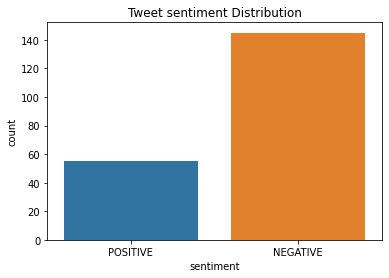

In [14]:
# Tweet sentiment Distribution
sns.countplot(df.sentiment)
plt.xlabel('sentiment')
plt.ylabel('count')
plt.title('Tweet sentiment Distribution')
plt.show()

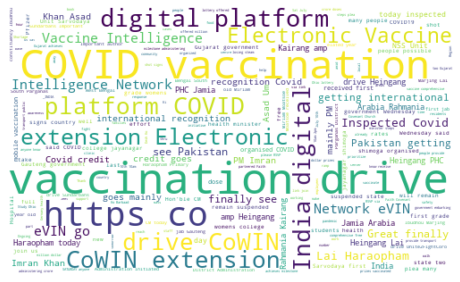

In [15]:
# visualization of the words
words=''.join([twts for twts in df['tweets']])
wordcloud=WordCloud(width=500,height=300,random_state=21,max_font_size=200,background_color='white').generate(words)
plt.figure(figsize=(8,5))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

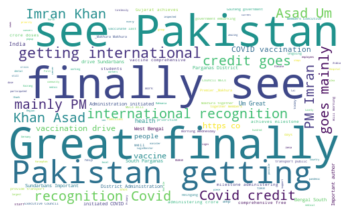

In [16]:
# visualization of positive tweets
words=''.join([twts for twts in df.tweets[df.sentiment=='POSITIVE']])
wordcloud=WordCloud(width=500,height=300,random_state=21,max_font_size=200,background_color='white').generate(words)
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

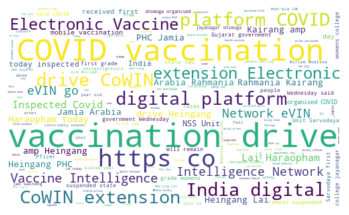

In [17]:
# Visualization of negative tweets
words=''.join([twts for twts in df.tweets[df.sentiment=='NEGATIVE']])
wordcloud=WordCloud(width=500,height=300,random_state=21,max_font_size=200,background_color='white').generate(words)
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()